## Post-processing of electromagnetic simulation result for field emission study in an ESS superconducting cavity


- Abstract

In this project post-processing of field emission, electromagnetic simulation results for a superconducting cavity in European Spallation Source (ESS) linear accelerator is presented. First a short overview for field emission is presented, then electromagnetic simulation results output are presented by 6 pictures. Afterward .txt file belong to simulation output are post processed by a prepared Python code. Then postprocessing results are presened by some graphs.<br />
The data post-processing is to turn qualitative simulation image to a quantitative form. At the end this study will tell us maximum field emission impact energy and number of similar impact energies.

- Field emission

Field emission is one of the important limiting factors in increasing a cavity-accelerating gradient. It is the emission of electrons from regions with high surface E-field. Emitted electrons absorb RF power, can generate dark current, increase cavity losses and even push the cavity to quench. In order to study field emission in medium beta cavity I have used CST particle solver to calculate maximum impact energy of field emitted electrons. Electron tracking simulation is to study the electron trajectory in the field emission and the impact energy calculation for the emitted electrons. The particle tracking study is performed for 10 MV/m.

- Electromagnetic simulation result output for electron tracking

|                         |                        |
|:-----------------------:|:----------------------:|
| <img src="01right.jpg"> | <img src="02left.jpg"> |
| <img src="02right.jpg"> | <img src="03left.jpg"> |
| <img src="03right.jpg"> | <img src="04left.jpg"> |

- Python code for post-rocessing .txt simulation files

In [9]:
import numpy as np
import pandas as pd
import sympy as sy
from ipywidgets import interactive
from sympy import init_session
import matplotlib.pyplot as plt
from pylab import rcParams
from matplotlib.pyplot import *

###############################################################
##### read 7 existing files with '.txt' suffix in current folder, their names start with 'iris'
###############################################################

iris1_right=pd.read_csv('iris1.right.txt',header=None,comment='#',names=['particles'])
L1_right=len(iris1_right)

iris2_left=pd.read_csv('iris2.left.txt',header=None,comment='#',names=['particles'])
L2_left=len(iris2_left)

iris2_right=pd.read_csv('iris2.right.txt',header=None,comment='#',names=['particles'])
L2_right=len(iris2_right)

iris3_left=pd.read_csv('iris3.left.txt',header=None,comment='#',names=['particles'])
L3_left=len(iris3_left)

iris3_right=pd.read_csv('iris3.right.txt',header=None,comment='#',names=['particles'])
L3_right=len(iris3_right)

iris4_left=pd.read_csv('iris4.left.txt',header=None,comment='#',names=['particles'])
L4_left=len(iris4_left)

iris4_right=pd.read_csv('iris4.right.txt',header=None,comment='#',names=['particles'])
L4_right=len(iris4_right)

e_track_iris1=pd.DataFrame(columns=())
e_track_iris2=pd.DataFrame(columns=())
e_track_iris3=pd.DataFrame(columns=())
e_track_iris4=pd.DataFrame(columns=())


###############################################################
##### looking at .txt files shows each one is a number of events which start with '0' and ends with a number.
##### This is electron track energy. I am only interested to the impact energy. The number before '0' is the 
##### impact energy for the previous event. Here I pickup impact energis by tracking the '0'.
###############################################################

i1=0
for i1 in range (1,L1_right):
    if int(iris1_right.iloc[i1])==0:
        iris1_right.iloc[i1-1]=10000*int((iris1_right.iloc[i1-1])/10000)
        e_track_iris1=e_track_iris1.append(iris1_right.iloc[i1-1])
L11=len(e_track_iris1)

        
i1=0        
for i1 in range (1,L2_left):
    if int(iris2_left.iloc[i1])==0:
        iris2_left.iloc[i1-1]=10000*int((iris2_left.iloc[i1-1])/10000)
        e_track_iris2=e_track_iris2.append(iris2_left.iloc[i1-1])
        
i1=0        
for i1 in range (1,L2_right):
    if int(iris2_right.iloc[i1])==0:
        iris2_right.iloc[i1-1]=10000*int((iris2_right.iloc[i1-1])/10000)
        e_track_iris2=e_track_iris2.append(iris2_right.iloc[i1-1])
L12=len(e_track_iris2)
        
i1=0        
for i1 in range (1,L3_left):
    if int(iris3_left.iloc[i1])==0:
        iris3_left.iloc[i1-1]=10000*int((iris3_left.iloc[i1-1])/10000)
        e_track_iris3=e_track_iris3.append(iris3_left.iloc[i1-1])
        
i1=0        
for i1 in range (1,L3_right):
    if int(iris3_right.iloc[i1])==0:
        iris3_right.iloc[i1-1]=10000*int((iris3_right.iloc[i1-1])/10000)
        e_track_iris3=e_track_iris3.append(iris3_right.iloc[i1-1])
L13=len(e_track_iris3)
        
i1=0        
for i1 in range (1,L4_left):
    if int(iris4_left.iloc[i1])==0:
        iris4_left.iloc[i1-1]=10000*int((iris4_left.iloc[i1-1])/10000)
        e_track_iris4=e_track_iris4.append(iris4_left.iloc[i1-1])
        
i1=0        
for i1 in range (1,L4_right):
    if int(iris4_right.iloc[i1])==0:
        iris4_right.iloc[i1-1]=10000*int((iris4_right.iloc[i1-1])/10000)
        e_track_iris4=e_track_iris4.append(iris4_right.iloc[i1-1])
L14=len(e_track_iris4)


###############################################################
### Test point
### Looking at .txt files tells that for iris1, iris2, iris3 and iris4 I expect to have 624, 1254, 1162 and 1214
### If iris events match show process is correct
###############################################################

e_track_iris1=e_track_iris1.sort_values('particles')
e_track_iris2=e_track_iris2.sort_values('particles')
e_track_iris3=e_track_iris3.sort_values('particles')
e_track_iris4=e_track_iris4.sort_values('particles')

a01=e_track_iris1.groupby(e_track_iris1.columns.tolist()).size()
a02=e_track_iris2.groupby(e_track_iris2.columns.tolist()).size()
a03=e_track_iris3.groupby(e_track_iris3.columns.tolist()).size()
a04=e_track_iris4.groupby(e_track_iris4.columns.tolist()).size()

print('iris1 events: ',a01.sum())
print('iris2 events: ',a02.sum())
print('iris3 events: ',a03.sum())
print('iris4 events: ',a04.sum())

iris1 events:  623
iris2 events:  1254
iris3 events:  1162
iris4 events:  1214


- Plotting results of post-processing

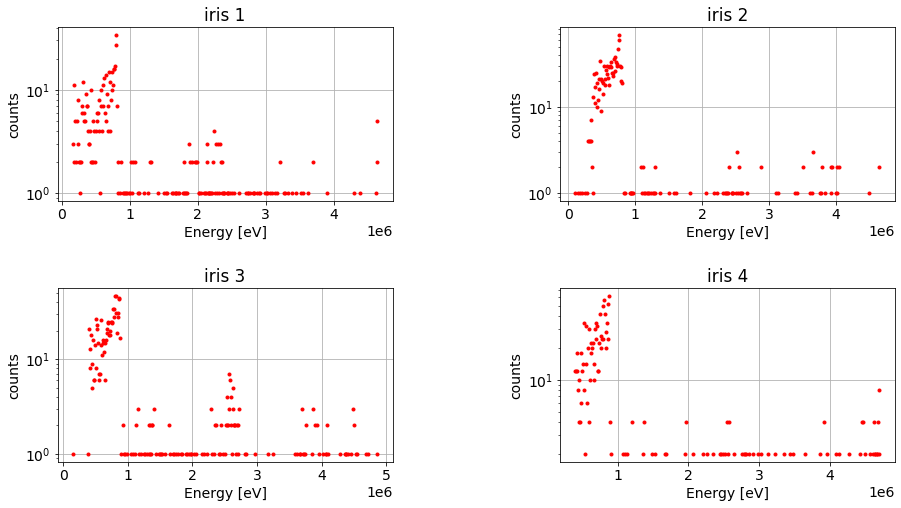

In [39]:
###############################################################
### Plotting and Saving
###############################################################
rcParams['figure.figsize'] = 15, 8
fig,ax=plt.subplots(2,2, sharex=True, sharey=True) 
matplotlib.rcParams.update({'font.size': 14})
subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
bottom=20 
top=20


subplot(2,2,1).plot(a01,'r.')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Energy [eV]')
plt.ylabel('counts')
plt.grid()
plt.yscale('log')
title('iris 1')
savefig( 'iris_1.pdf', fmt='PDF', dpi=100)
plt.subplots_adjust(hspace=1,wspace=0.5)
    
subplot(2,2,2).plot(a02,'r.')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Energy [eV]')
plt.ylabel('counts')
plt.grid()
plt.yscale('log')
title('iris 2')
savefig( 'iris_2.pdf', fmt='PDF', dpi=100)
plt.subplots_adjust(hspace=1,wspace=0.5)


subplot(2,2,3).plot(a03,'r.')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Energy [eV]')
plt.ylabel('counts')
plt.grid()
plt.yscale('log')
title('iris 3')
savefig( 'iris_3.pdf', fmt='PDF', dpi=100)
plt.subplots_adjust(hspace=1,wspace=0.5)


subplot(2,2,4).plot(a04,'r.')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('Energy [eV]')
plt.ylabel('counts')
plt.grid()
plt.yscale('log')
title('iris 4')
savefig( 'iris_4.pdf', fmt='PDF', dpi=100)
plt.subplots_adjust(hspace=0.5,wspace=0.5)
